# Titanic Challenge

Dataset: https://www.kaggle.com/c/titanic/data

Data Dictionary: http://choens.github.io/titanic/workshops/regression/data-dictionary/

## Questions to Answer:
<ol>
    <li> Did men or women have a higher chance of survival? </li>
    <li> Did the old or young have a higher chance of survival?</li>
    <li> Did the port of embarkation play a role in chances of survival? </li>
    <li> Which passenger class was most likely to survive? </li>
</ol>

In [114]:
import pandas as pd
import numpy as np

In [55]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


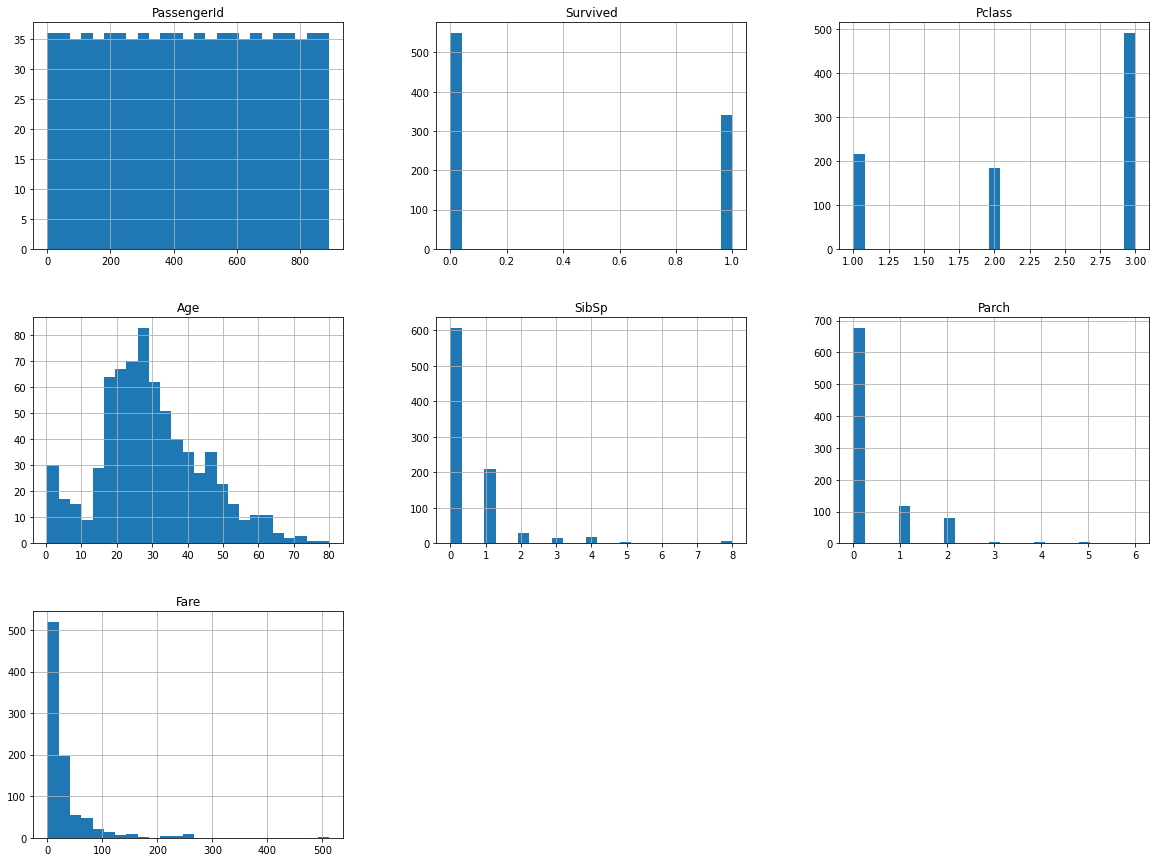

In [58]:
import matplotlib.pyplot as plt

titanic_df.hist(bins=25, figsize=(20,15))
plt.show()

In [59]:
corr_matrix = titanic_df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [60]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

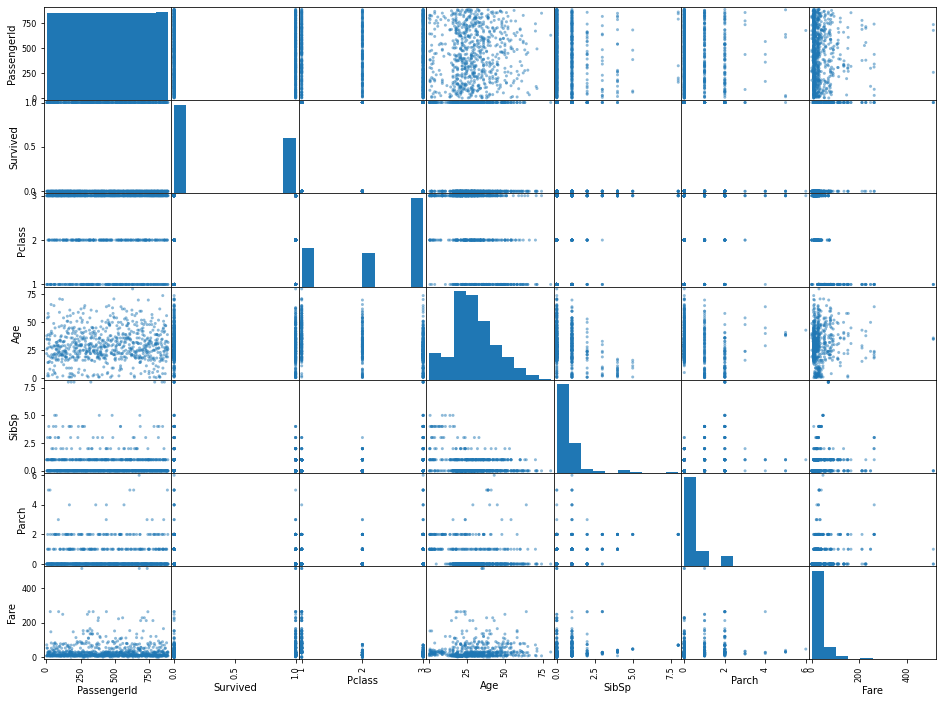

In [61]:
from pandas.plotting import scatter_matrix

scatter_matrix(titanic_df, figsize=(16, 12))
plt.show()

In [95]:
drop_na = titanic_df.dropna(subset=['Embarked']) # one value with no embarked category, drop that row
y_train = drop_na['Survived'].copy()
x_train = drop_na.drop(columns = 'Survived').copy()

Dropping cabin # due to large number of missing values and unique strings likely won't be useful in predictions. Also dropping name and ticket as strings likely won't be useful and PassengerId as this is just an ID and does not provide any info. 

In [96]:
x_train_drop = x_train.drop(columns = ['Cabin', 'Name', 'Ticket', 'PassengerId']).copy()
x_train_drop.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [97]:
x_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


In [73]:
x_train_drop['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [74]:
x_train_drop['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We check number of possible values in the dataset for each of the categorical values. Since sex only has two possible values in this dataset, we can encode this as ones and zeros using ordinal encoder

In [75]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
sex_encoded = ordinal_encoder.fit_transform(x_train_drop[['Sex']])
sex_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

Now we can see encoded values (female = 0, male = 1)

In [76]:
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object)]

Embarked has 3 possible values so if we just use ordinal encoding, 0 and 1 could be interpreted as closer together than 0 and 2 when they are really distinct categories, which may affect predictions. Use one-hot encoding to prevent this bias. 

In [77]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
embarked_encoded = one_hot_encoder.fit_transform(x_train_drop[['Embarked']])
embarked_encoded

<889x3 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

Age could potentially be a useful attribute and about 20% missing so too many missing to just drop, so we will impute the median for missing values. 

In [79]:
median = x_train_drop['Age'].median() # compute median for use with fillna on future or test data
print(median)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
x_train_num = x_train_drop.drop(columns=['Sex','Embarked']) # imputer only works on numerical attributes, drop the categorical
imputer.fit(x_train_num)
print(imputer.statistics_)
print(housing_num.median().values)

28.0
[ 3.     28.      0.      0.     14.4542]
[ 3.     28.      0.      0.     14.4542]


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x_train_num = x_train_drop.drop(columns=['Sex', 'Embarked'])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

x_train_tr = num_pipeline.fit_transform(x_train_num)

array([[ 0.82520863, -0.56367407,  0.43135024, -0.47432585, -0.50023975],
       [-1.57221121,  0.66921696,  0.43135024, -0.47432585,  0.78894661],
       [ 0.82520863, -0.25545131, -0.47519908, -0.47432585, -0.48664993],
       ...,
       [ 0.82520863, -0.10133993,  0.43135024,  2.00611934, -0.17408416],
       [-1.57221121, -0.25545131, -0.47519908, -0.47432585, -0.0422126 ],
       [ 0.82520863,  0.20688282, -0.47519908, -0.47432585, -0.49017322]])

In [104]:
from sklearn.compose import ColumnTransformer

num_attribs = list(x_train_num)
one_hot_attribs = ['Embarked']
ordinal_attribs = ['Sex']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('sex', OrdinalEncoder(), ordinal_attribs),
    ('emb', OneHotEncoder(), one_hot_attribs),
])

x_prepared = full_pipeline.fit_transform(x_train_drop)
x_prepared

array([[ 0.82520863, -0.56367407,  0.43135024, ...,  0.        ,
         0.        ,  1.        ],
       [-1.57221121,  0.66921696,  0.43135024, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82520863, -0.25545131, -0.47519908, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82520863, -0.10133993,  0.43135024, ...,  0.        ,
         0.        ,  1.        ],
       [-1.57221121, -0.25545131, -0.47519908, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82520863,  0.20688282, -0.47519908, ...,  0.        ,
         1.        ,  0.        ]])

In [100]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_prepared, y_train)

SGDClassifier()

In [108]:
sgd_clf.predict([x_prepared[1]])

array([1])

In [109]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_prepared, y_train, cv=3, scoring="accuracy")

array([0.72053872, 0.75675676, 0.80405405])

In [115]:
from sklearn.base import BaseEstimator

class AlwaysDeadClassifier(BaseEstimator):
    def fit(self,  X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [116]:
always_dead_clf = AlwaysDeadClassifier()
cross_val_score(always_dead_clf, x_prepared, y_train, cv=3, scoring="accuracy")

array([0.64646465, 0.56756757, 0.63851351])

In [117]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_prepared, y_train, cv=3)

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[458,  91],
       [117, 223]])

In [120]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.6819571865443425

In [121]:
y_scores = cross_val_predict(sgd_clf, x_prepared, y_train, cv=3, method="decision_function")

In [122]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

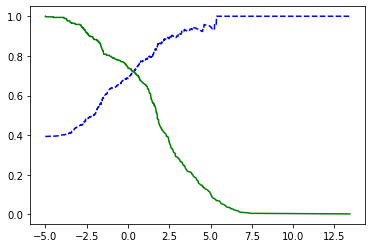

In [124]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

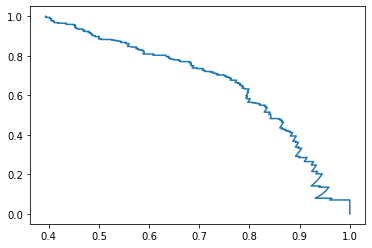

In [127]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(precisions, recalls)
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [128]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

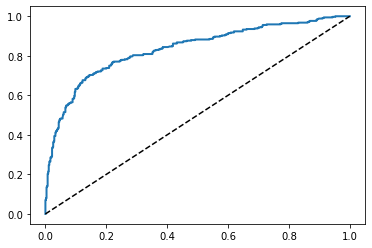

In [131]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8338851387549555

In [135]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, x_prepared, y_train, cv=3, method="predict_proba")

In [136]:
y_scores_forest = y_probas_forest[:, 1] # scores = probability of positive class
fpr_forest, tpr_forest, thresholds_forst = roc_curve(y_train, y_scores_forest)

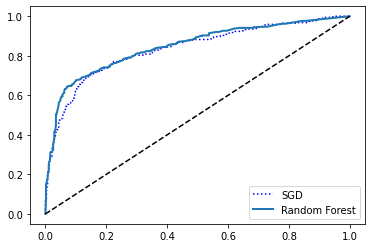

In [137]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [138]:
roc_auc_score(y_train, y_scores_forest)

0.8461882567234545

In [142]:
len(x_prepared)

889

In [155]:
from sklearn.model_selection import GridSearchCV 

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, class_weight=class_weight, eta0=eta0) 

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = GridSearchCV(estimator=sgd, scoring='roc_auc', verbose=1, n_jobs=-1, param_grid=param_distributions) 
random_result = random.fit(x_prepared, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_) 

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 16536 tasks      | elapsed:   11.7s


Best Score:  0.8544732129715941
Best Params:  {'alpha': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'invscaling', 'loss': 'log', 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:   17.1s finished
/Users/z003zkv/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Best Score:  0.8527689741451209
Best Params:  {'penalty': 'l1', 'loss': 'modified_huber', 'learning_rate': 'optimal', 'eta0': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'alpha': 0.01}
    
Best Score:  0.8533963351812786
Best Params:  {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 100, 'class_weight': {1: 0.6, 0: 0.4}, 'alpha': 0.01}
    
Best Score:  0.8544732129715941
Best Params:  {'alpha': 0.0001, 'class_weight': {1: 0.6, 0: 0.4}, 'eta0': 10, 'learning_rate': 'invscaling', 'loss': 'log', 'penalty': 'l1'}

In [161]:
n_estimators = [500, 750, 1000]
max_depth = [8, 15, 25]
min_samples_split = [1, 3, 5, 10]
min_samples_leaf = [1, 3, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, n_jobs = -1, scoring='roc_auc')
bestF = gridF.fit(x_prepared, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.1min finished


In [162]:
print('Best Score: ', bestF.best_score_) 
print('Best Params: ', bestF.best_params_) 

Best Score:  0.8649715690325156
Best Params:  {'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}


Best Score:  0.8324195407528742
Best Params:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Best Score:  0.8647639255464128
Best Params:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}

Best Score:  0.8649715690325156
Best Params:  {'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500}

In [164]:
final_forest_clf = RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=500)
y_final_probas_forest = cross_val_predict(final_forest_clf, x_prepared, y_train, cv=3, method="predict_proba")
y_final_scores_forest = y_final_probas_forest[:, 1] # scores = probability of positive class
roc_auc_score(y_train, y_final_scores_forest)

0.859131576127719

In [171]:
final_forest_clf.fit(x_prepared, y_train)
x_test_prepared = full_pipeline.fit_transform(test_df)
y_train_probas = final_forest_clf.predict(x_test_prepared)

In [173]:
len(y_train_probas)

418

In [176]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [210]:
val = test_df['PassengerId'].to_numpy()
# print(type(val))
# newVal = np.array([val, y_train_probas])
# type(newVal)
dataset = pd.DataFrame({'PassengerId': val, 'Survived': y_train_probas})
dataset.head()
dataset.to_csv('titanic_predictions.csv', index=False)
# df = pd.DataFrame(newVal, columns = ['PassengerId','Survived'])
# df.head()